In [5]:
import os 
from lsd import DB
import lsd.bounds as b

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
db = DB(os.environ['LSD_DB'])
#bounds_xy = b.rectangle(0,0,360,90)

#The whole shebang - slow
rarange=[0,360]
decrange=[0,90]

#rarange=[160,200]
#decrange=[20,60]

bounds_xy = b.rectangle(rarange[0],decrange[0],rarange[1],decrange[1])
#bounds_circ=b.beam(230,10,10)
#bounds_xy=b.rectangle(180.0,20.0,181.0,21.0)

rows = db.query('select ra,dec,g,r from sdss where (r > 20) & (r < 22) & (g - r < 0.4)').fetch(bounds=[(bounds_xy, None)])

 [1279 el.]WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
::>  195.58 sec


6675976


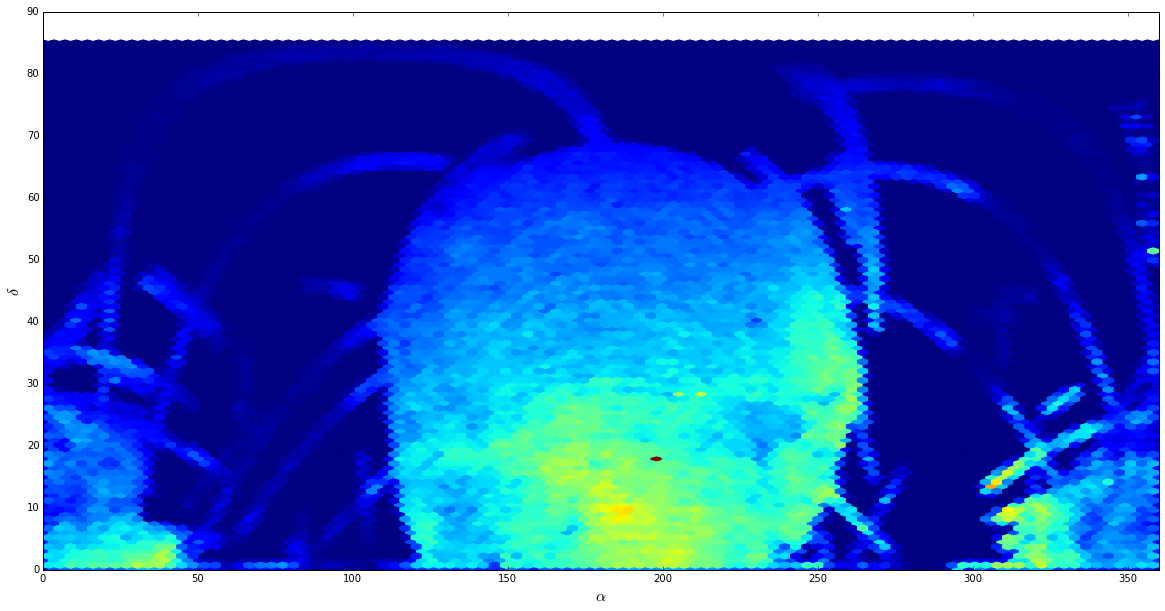

In [7]:
print len(rows)

ra=rows.ra
dec=rows.dec

plt.figure(figsize=[20,10])
plt.hexbin(ra,dec,bins=120)
plt.xlim(rarange)
plt.ylim(decrange)
plt.xlabel(r'$\alpha$',size=16)
plt.ylabel(r'$\delta$',size=16)



In [8]:
blue=rows[rows.r < 20.66667]
green=rows[(rows.r > 20.66667) & (rows.r < 21.33333)]
red=rows[rows.r > 21.33334]

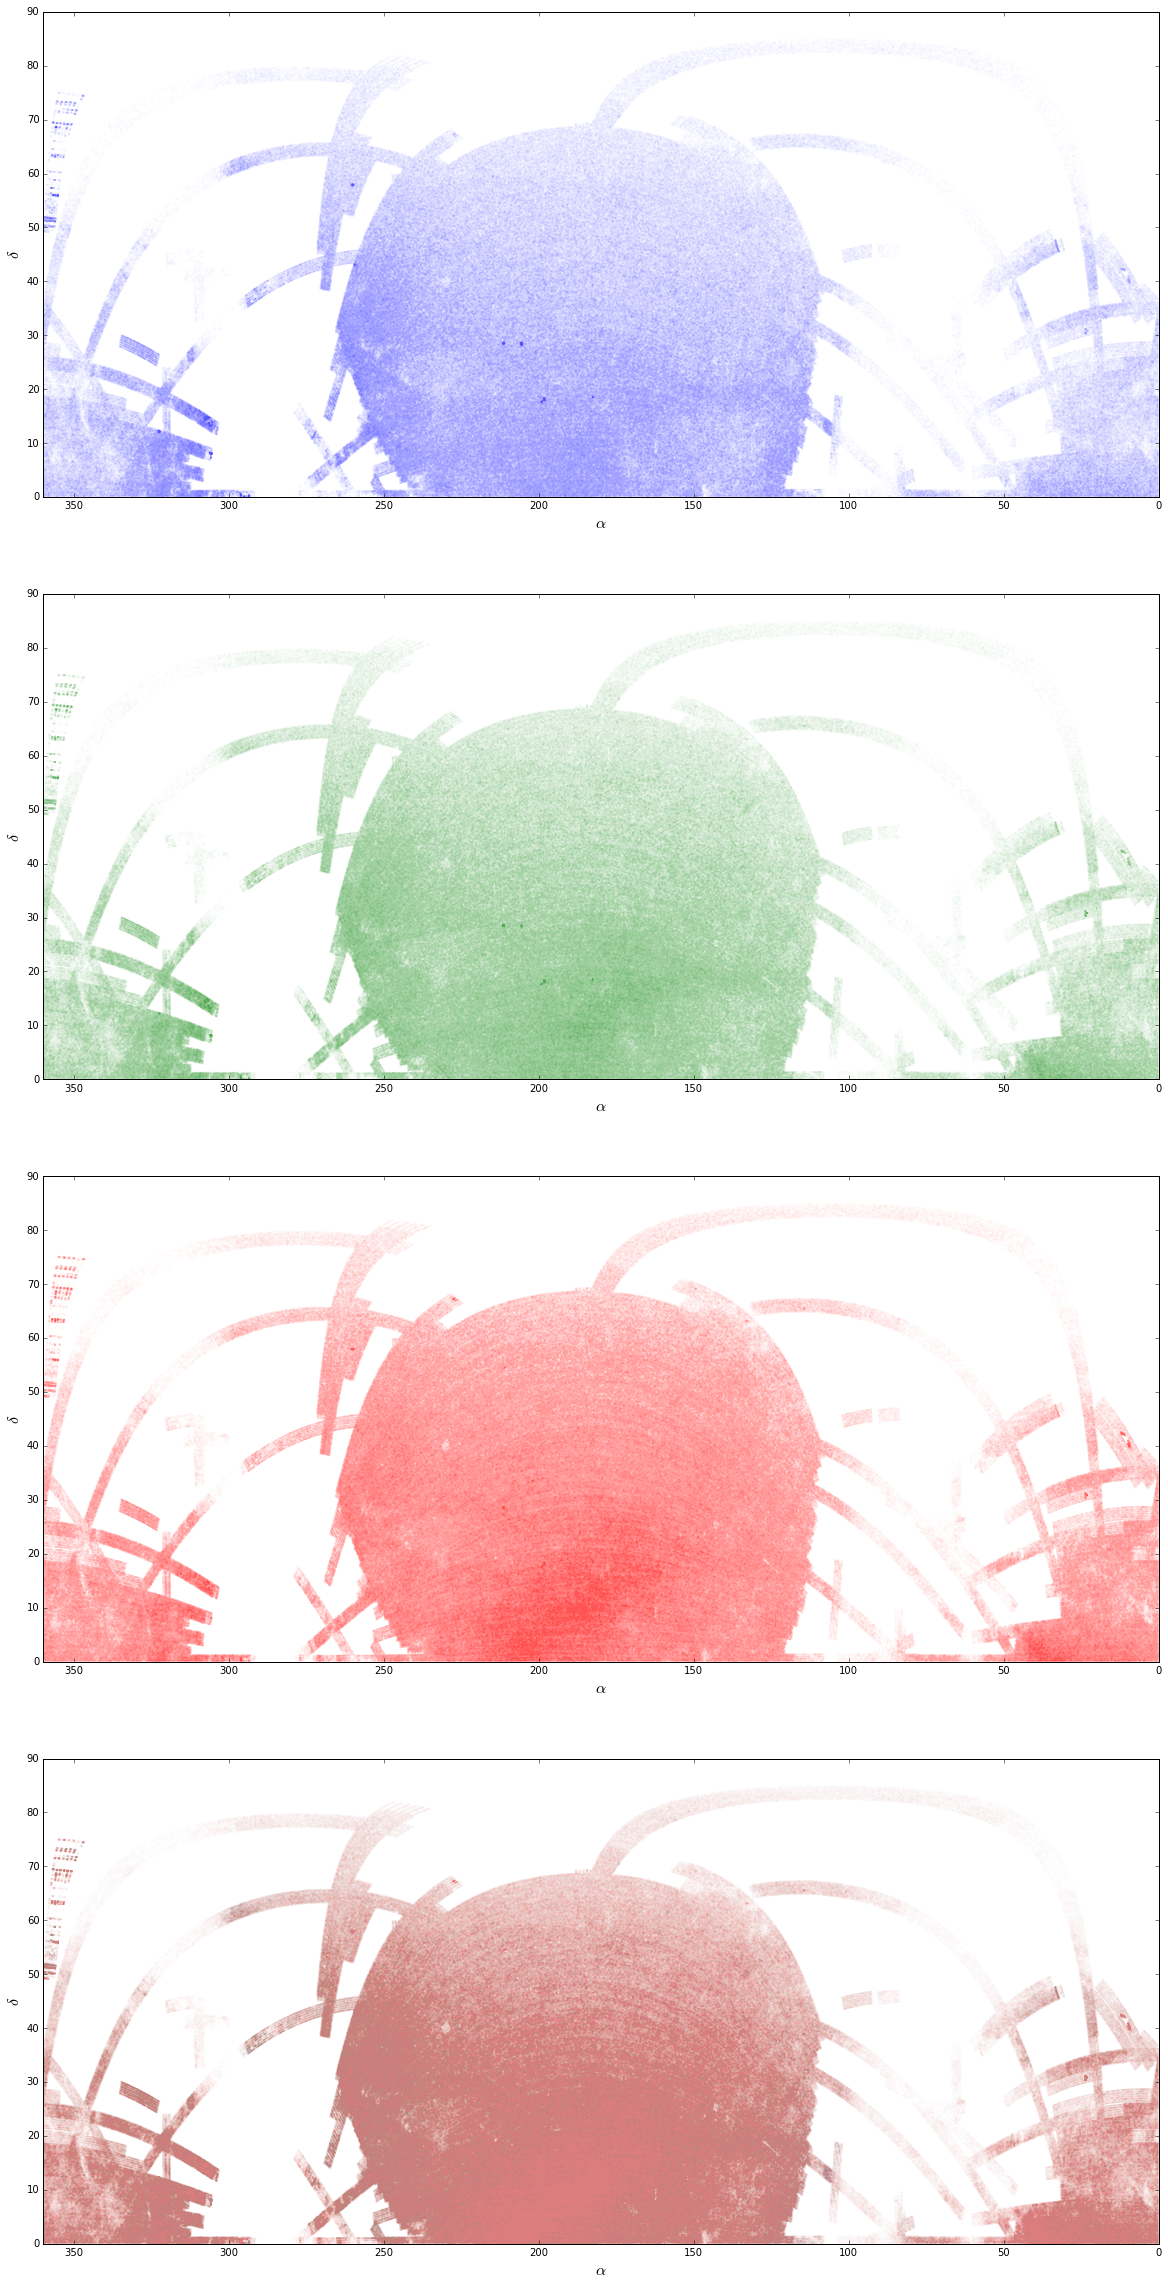

In [9]:
f,ax = plt.subplots(4,sharex=False,sharey=True,figsize=[20,40])

ax[0].scatter(blue.ra,blue.dec,color='blue',s=0.001,marker='.',alpha=0.8,label='blue')
ax[1].scatter(green.ra,green.dec,color='green',s=0.001,marker='.',alpha=0.8,label='green')
ax[2].scatter(red.ra,red.dec,color='red',s=0.001,marker='.',alpha=0.8,label='red')
ax[3].scatter(blue.ra,blue.dec,color='blue',s=0.001,marker='.',alpha=0.5,label='blue')
ax[3].scatter(green.ra,green.dec,color='green',s=0.001,marker='.',alpha=0.5,label='green')
ax[3].scatter(red.ra,red.dec,color='red',s=0.001,marker='.',alpha=0.5,label='red')

for i in range(0,4):
    ax[i].set_xlabel(r'$\alpha$',size=16)
    ax[i].set_ylabel(r'$\delta$',size=16)
    ax[i].set_xlim(rarange)
    ax[i].set_ylim(decrange)
    ax[i].invert_xaxis()

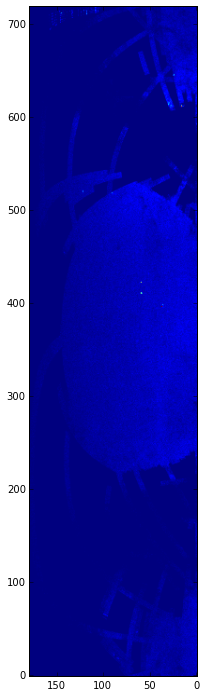

In [10]:
RA=np.array([blue.ra,green.ra,red.ra])
DEC=np.array([blue.dec,green.dec,red.dec])


Hb_B, xedges_B, yedges_B = np.histogram2d(blue.dec,blue.ra,[180,720])
Hb_G, xedges_G, yedges_G = np.histogram2d(green.dec,green.ra,[180,720])
Hb_R, xedges_R, yedges_R = np.histogram2d(red.dec,red.ra,[180,720])



f,ax=plt.subplots(figsize=[18,12])
ax.imshow(Hb_B.transpose())
ax.invert_yaxis()
ax.invert_xaxis()
#plt.ylim([0,60])

#plt.xlim([100,200])


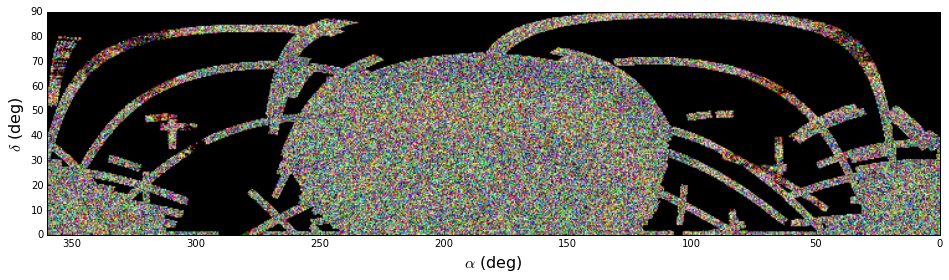

In [20]:

#print Hb_R,Hb_G,Hb_B.shape

compimage_normed=255*np.dstack([Hb_R/(Hb_R.max()),Hb_G/(Hb_G.max()),Hb_B/(Hb_B.max())])
compimage=np.dstack([Hb_R,Hb_G,Hb_B])
#compimage[:,:,0]=Hb_R
#compimage[:,:,1]=Hb_G
#compimage[:,:,2]=Hb_B

#compimage=np.array([Hb_R,Hb_G,Hb_B])
#r_compimage= np.reshape(compimage,[180,720,3])

f,ax=plt.subplots(figsize=[16,8])
ax.imshow(compimage_normed,alpha=1,extent=(0,360,90,0),aspect='equal')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_xlabel(r'$\alpha$ (deg)',size=16)
ax.set_ylabel(r'$\delta$ (deg)',size=16)

In [19]:
print compimage_normed[:,:,0].max()
print compimage_normed[:,:,0].mean()

255.0
7.8294666145


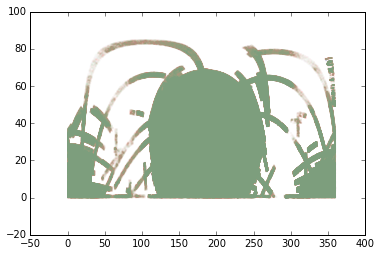

In [13]:

plt.scatter(blue.ra,blue.dec,color='blue',s=0.001,marker='.',alpha=0.5,label='blue')
plt.scatter(red.ra,red.dec,color='red',s=0.001,marker='.',alpha=0.5,label='red')
plt.scatter(green.ra,green.dec,color='green',s=0.001,marker='.',alpha=0.5,label='green')


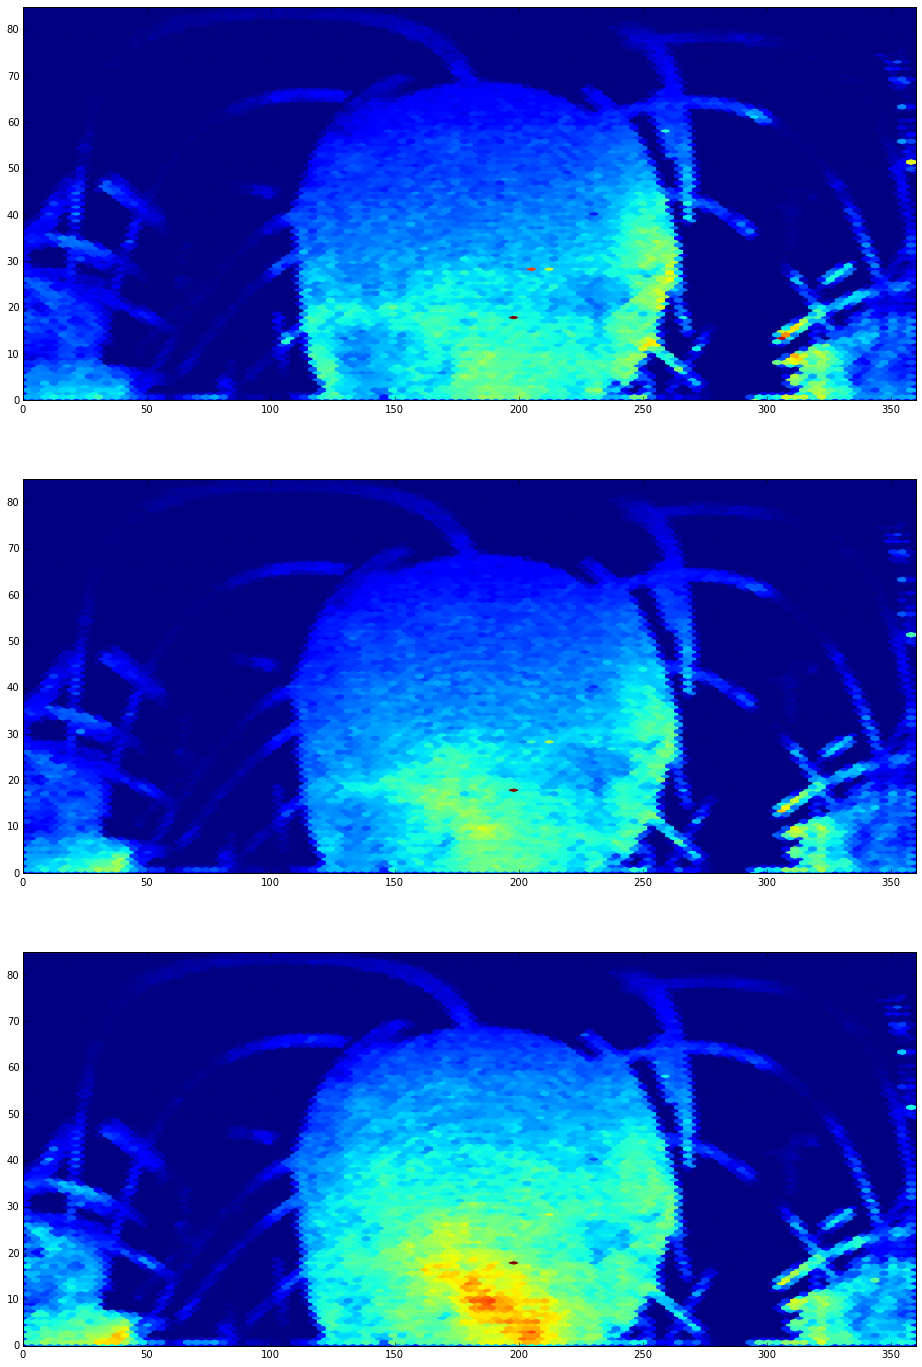

In [14]:
f,ax = plt.subplots(3,sharex=False,sharey=True,figsize=[16,24])

ax[0].hexbin(blue.ra,blue.dec)
ax[1].hexbin(green.ra,green.dec)
ax[2].hexbin(red.ra,red.dec)

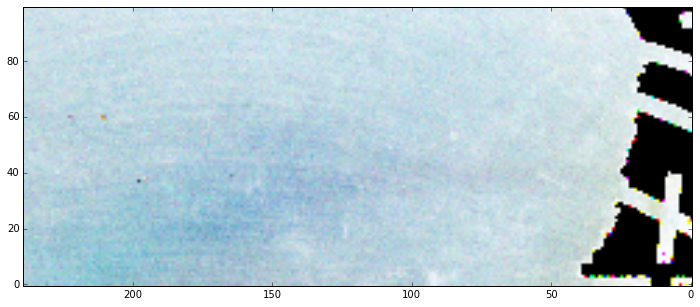

In [15]:
f,ax=plt.subplots(1,figsize=[12,10])
ax.imshow(compimage[0:100,200:440])
ax.invert_xaxis()
ax.invert_yaxis()